In [139]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

dimension x (100, 2)
dimension y (100, 1)


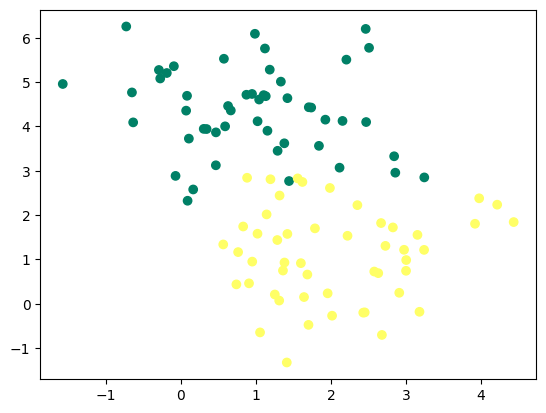

In [140]:
X,y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print ('dimension x', X.shape)
print ('dimension y', y.shape)
plt.scatter(X[:,0], X[:,1], c=y, cmap ='summer')
plt.show()

In [141]:
def initialisation(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return W,b 

In [142]:
W,b = initialisation(X)

In [143]:
def model(X,W,b):
   Z = X.dot(W) + b
   A = 1 / (1 + np.exp(-Z))
   return A

In [144]:
A = model(X,W,b)

In [145]:
def log_loss(A, y):
    m = A.shape[0]
    erreur = (-1/m) * np.sum(y * np.log(A) + (1-y) * np.log(1 - A))
    return erreur

In [146]:
erreur = log_loss(A, y)

In [147]:
def gradients(A,X,y):
    m = A.shape[0]
    dw = (1/m) * X.T.dot(A - y)
    db = (1/m) * np.sum(A - y)
    return dw, db

In [148]:
dw, db = gradients(A,X, y)

In [173]:
def predict(X, W, b):
    A = model(X,W,b)
    A_pred = (A > 0.5).astype(int)
    return (A_pred)

In [ ]:
def gradient_descent(X, learning_rate=0.1):
    W,b = initialisation(X)
    loss = []
    for i in range(1000):
        A = model(X,W, b)
        dw,db = gradients(A,X,y)
        loss.append(log_loss(A, y))
        W = W - learning_rate*dw
        b = b - learning_rate*db
    y_pred = predict(X,W,b)
    return W, b, loss

In [171]:
W,b, loss=gradient_descent(X)
print(W)
print(b)

[[ 0.88486014]
 [-1.17562534]]
[1.48776349]


In [152]:
y_pred = predict(X,W,b)

In [153]:
from sklearn.metrics import classification_report
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        50
           1       0.96      0.92      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



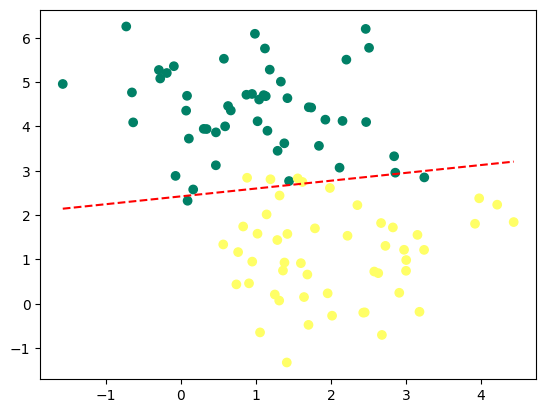

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, cmap ='summer')
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(W[0] * x_vals + b) / W[1]

plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Droite w.x + b = 0')
plt.show()


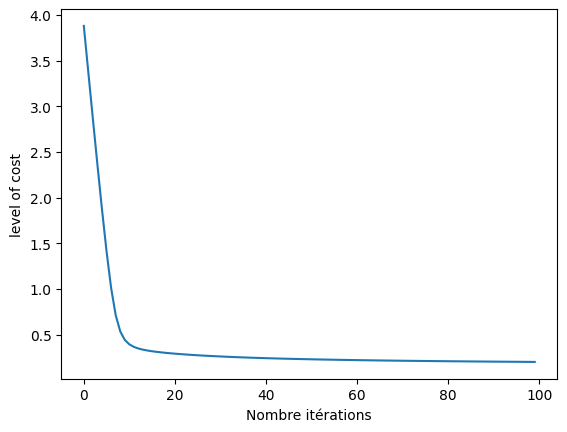

In [172]:
plt.plot(loss)
plt.xlabel("Nombre itérations")
plt.ylabel("level of cost")
plt.show()